In [1]:
from sympy import Matrix, symbols, sin, cos, trigsimp, init_printing, I, \
    simplify, Eq, solve, expand, lambdify, diff, solveset, exp
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import os
init_printing()

In [2]:
i, vo, vbe, n, vd, vt, Is, k = symbols("i Vout V_{BE} n V_D V_T I_S k")

Formula for a shockley diode basically taken from wikipedia.  I started this to see if I could estimate values of $ n V_T $ and $ I_S $ from the data sheet.  It has been a little less than straight forward but this notebook is about this attempt.

In [3]:
expr1 = Is * (exp(vbe/(n*vt))-1); expr1

/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning:

Because I don't care about constituents of  $ n V_T $ I replace it with k.

In [4]:
expr2 = expr1.subs(vt*n, k); expr2


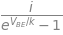

In [5]:
expr3 = solve(expr2-i, Is)[0]; expr3

Because my datasheet says that at 0.6V the current = 200 $ \mu A $ and at 0.8V the current = 100 mA then I try to find the relationship between $ I_S $ and k.

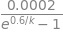

In [6]:
e3 = expr3.subs(((vbe, 0.6), (i, 0.0002))); e3

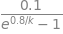

In [7]:
e4 = expr3.subs(((vbe, 0.8), (i, 0.1))); e4

In [8]:
ks = solve(Eq(e3, e4), k); ks

In [9]:
is_val = e4.subs(k, ks[0]); is_val

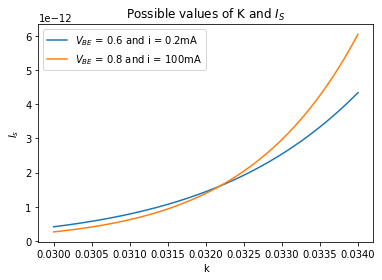

In [10]:
fig, ax = plt.subplots()
x = np.linspace(.030, 0.034, 1000)
f1 = lambdify(k, e3, "numpy")
f2 = lambdify(k, e4, "numpy")
ax.plot(x, f1(x), label="$ V_{BE} $ = 0.6 and i = 0.2mA")
ax.plot(x, f2(x), label="$ V_{BE} $ = 0.8 and i = 100mA")

ax.set_title("Possible values of K and $ I_S $")
ax.set_xlabel('k')
ax.set_ylabel("$ I_s $")
ax.legend()

In [11]:
e2 = expr2.subs(((Is, is_val),(k, ks[0]))); e2

/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/splat/.local/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning:

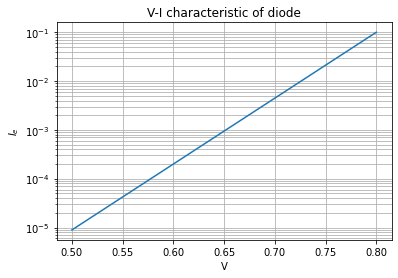

In [12]:
fig, ax = plt.subplots()
x = np.linspace(0.5, 0.8, 1000)
f1 = lambdify(vbe, e2, "numpy")
ax.plot(x, f1(x))
ax.set_title("V-I characteristic of diode")
ax.set_xlabel('V')
ax.set_ylabel("$ I_e $")
ax.set_yscale("log")
ax.grid(which="both", axis='both')
